### CAPSTONE PROJECT GOOGLE ADVANCED DATA ANALYTICS CERTIFICATE

**Business Scenerio**

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

**Project Objective**

To analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.


**Data Information**

**Data Source**: [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)

There are 14,999 rows and 10 columns in this dataset with its variables described below.

**Variable Description:**

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)


#### Importing Packages

In [1]:
#operational packages for data manipulation
import pandas as pd
import numpy as np

#data visulaization packages
import matplotlib.pyplot as plt
import seaborn as sns

#data modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

#model evaluation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.tree import plot_tree


#to display all dataframe columns
pd.set_option('display.max_columns', None)

#### Loading Dataset

In [2]:
#loading dataset into a dataframe
df0 = pd.read_csv('HR_comma_sep.csv')

#displaying the first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration (Initial EDA and Data Cleaning)

#### Gathering basic Information about data

In [3]:
#Concise summary of the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Gathering descriptive statistics about the data

In [4]:
#statistical summary of the data
df0.describe(include ='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


#### Renaming Columns

There is need to rename some columns and standardize their names so they are all in snake_case

In [5]:
#Displaying Column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
#renaming columns
df0 = df0.rename(columns = {'Work_accident': 'work_accident',
                     'average_montly_hours': 'average_monthly_hours',
                     'time_spend_company': 'tenure',
                     'Department': 'department'})

#redisplaying column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Checking missing values

In [7]:
#checking for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data

#### Checking for duplicates

In [8]:
#checking for duplicates
df0.duplicated().sum()

3008

There 3008 duplicate rows in the data. This is about 20% of the data

In [9]:
#inspecting rows containing duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


These are first five occurences of rows that are duplicated farther down in the dataframe. Just to confirm that these are actual duplicate. Will place them side by side their respective duplicate rows

In [10]:
#sorting the dataframe
df0_sorted = df0.sort_values(by=df0.columns.tolist())

#creating a mask for duplicate entries to filter the sorted data
duplicates_mask = df0_sorted.duplicated(keep='first') | df0_sorted.duplicated(keep ='last')

#filtering out duplicates from the sorted dataframe
entry_and_its_duplicates = df0_sorted[duplicates_mask]
entry_and_its_duplicates

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [11]:
#Dropping duplicates and saving resulting dataframe in a new variable

df1 = df0.drop_duplicates(keep = 'first')

#displaying first few rows of new dataframe
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Checking for Outliers

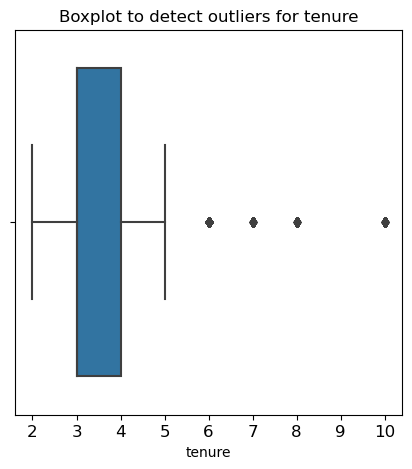

In [12]:
#creating a boxplot to visualize distribution of tenure and detect outliers
plt.figure(figsize=(5,5))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot shows that there are outliers in the 'tenure' variable. Next,we investigate where these outliers are in the data  

In [13]:
# Determining the number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

iqr =percentile75 - percentile25

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

mask = ((df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit))
outliers = df1[mask]

print('\n Number of rows in the data containing outliers in tenure is:', len(outliers))
outliers

upper_limit: 5.5
lower_limit: 1.5

 Number of rows in the data containing outliers in tenure is: 824


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Decision to drop or retain outliers will be decided in the model building stage

### Data Exploration (EDA continues)

Next, we begin by understanding how many employees left and what percentage of all employees the figure represents

In [14]:
#numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

#percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Approximately 17% of employees left the company

In [15]:
#number of employees in each salary category
df1['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

### Data Visualization

Creating a stacked boxplot to compare the distributions of employees who stayed versus those who left based on their average monthly hours and number of projects

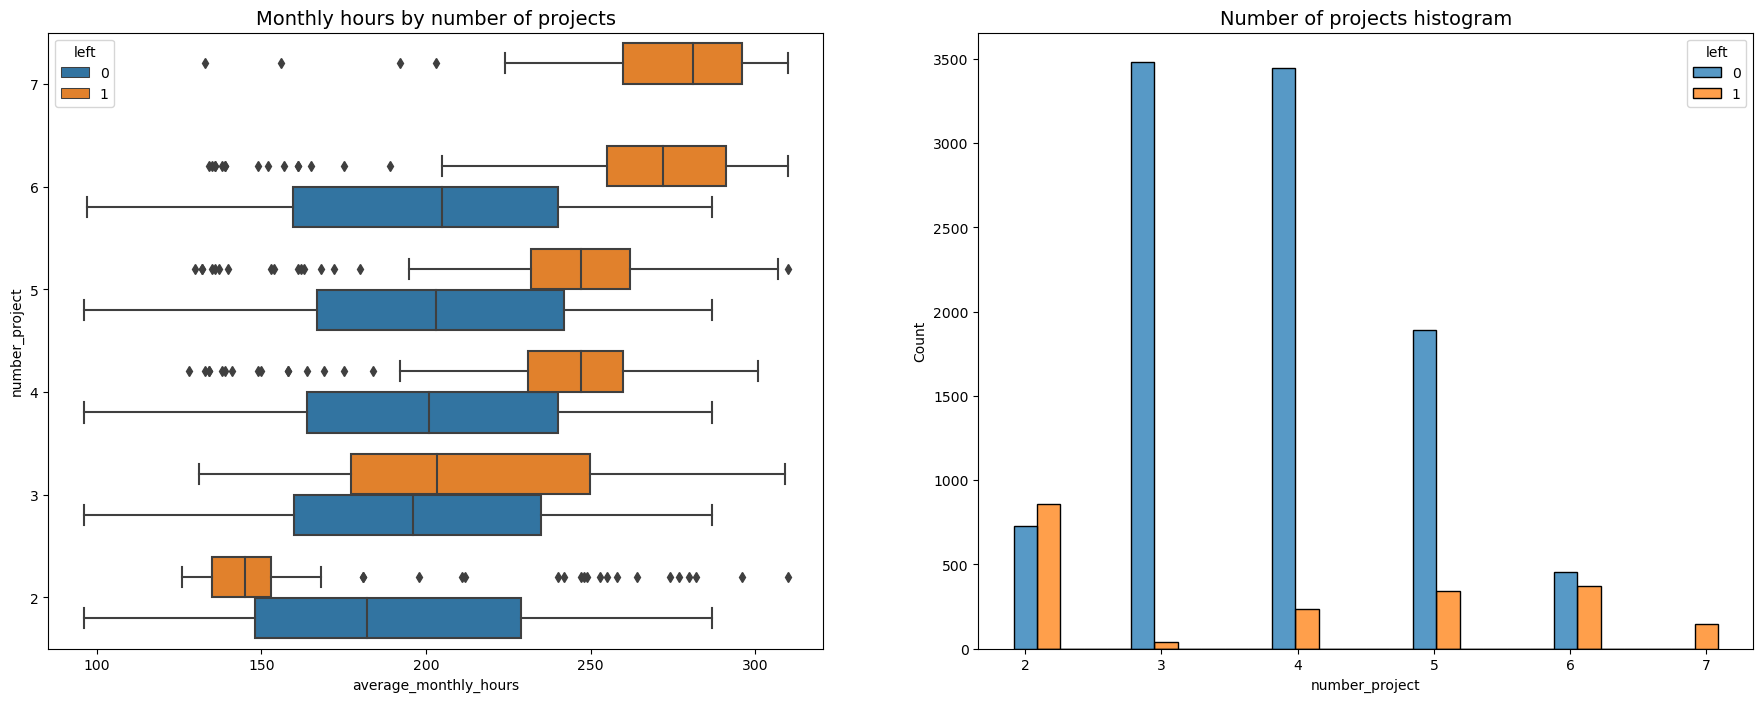

In [16]:
# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creating boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Creating histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

* The stacked boxplot showed that the average hours of employees who stayed and those that left increased with the number of projects worked on. i.e employees who worked more project also worked more hours

* We also notice that those who worked less hours than their peers with the same number of projects left the company. It could be that they were fired from their jobs or resigned

* Also, the employees who worked more hours with more project also left the company.It could be that they felt overworked and resigned their jobs too

* From the hist plot, we observe that employees with 7 projects left the company

* Also, the maximum number of projects assigned to most employees is between 3 and 4.



Next we explore the satisfaction level of the employees

In [17]:
#Calculating mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Next we explore the relationship between employees salary and their tenures

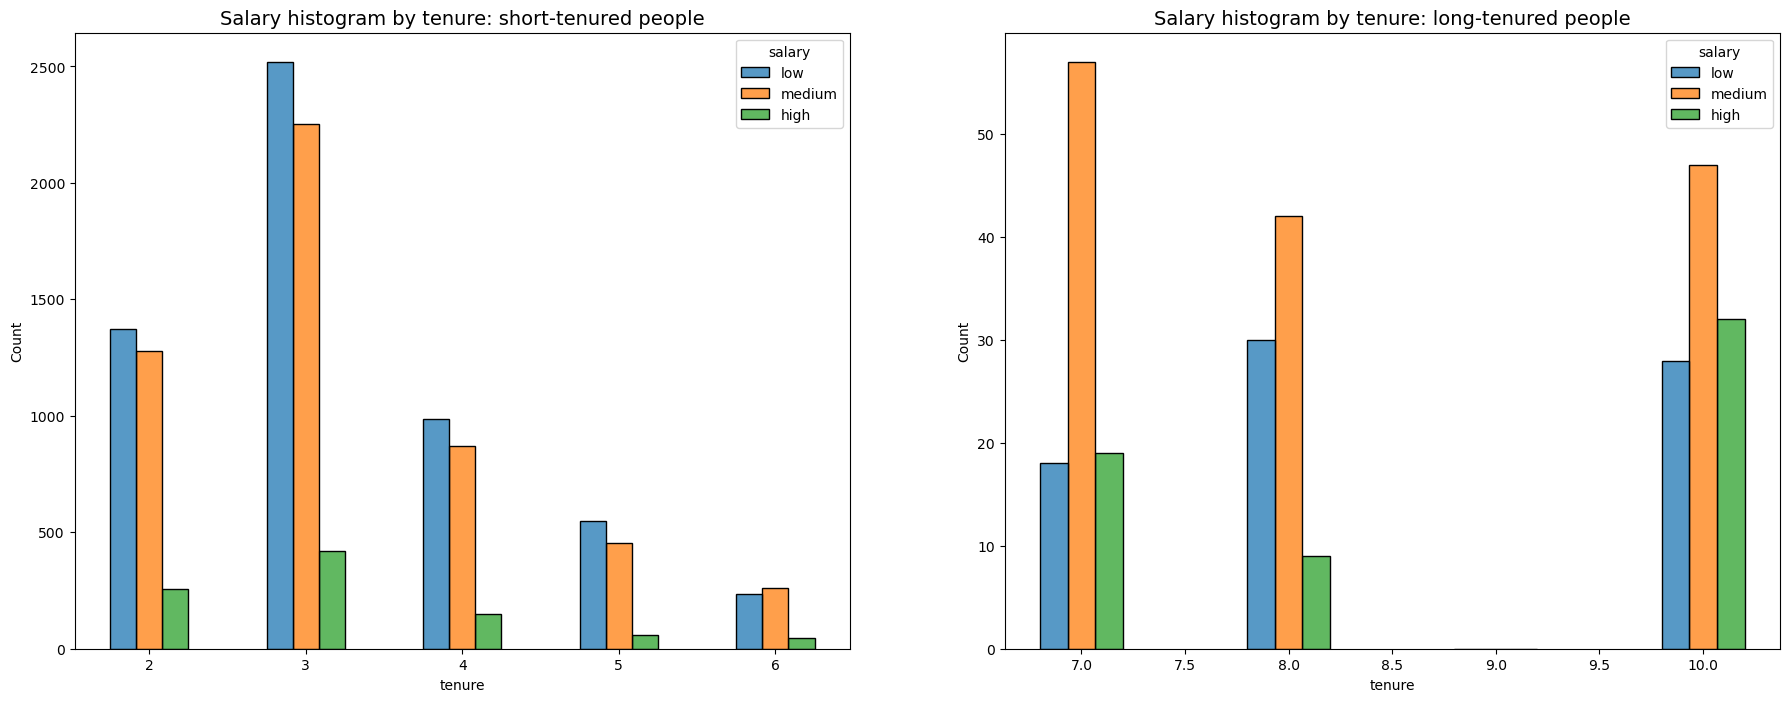

In [18]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

Employees with the highest paid salary are in the category of those who worked 10 years while the lowest paid employees are in the category of those who have worked for 3 years in the company

Next we examine department with the highest number of employee who left

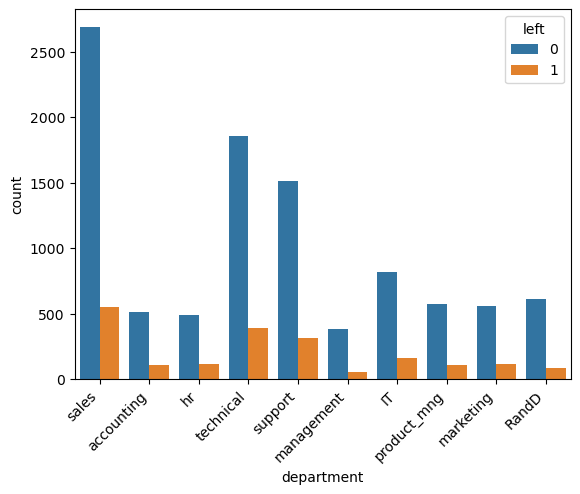

In [19]:
#employee who left or stayed in each department
sns.countplot(x='department', hue='left', data=df1)
plt.xticks(rotation =45, ha='right')
plt.show()

In [20]:
#total number of employees in each department
df1['department'].value_counts(normalize=True)

department
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: proportion, dtype: float64

The department with the highest number of employees who left is the sales department. it is also the department with the most number of employees

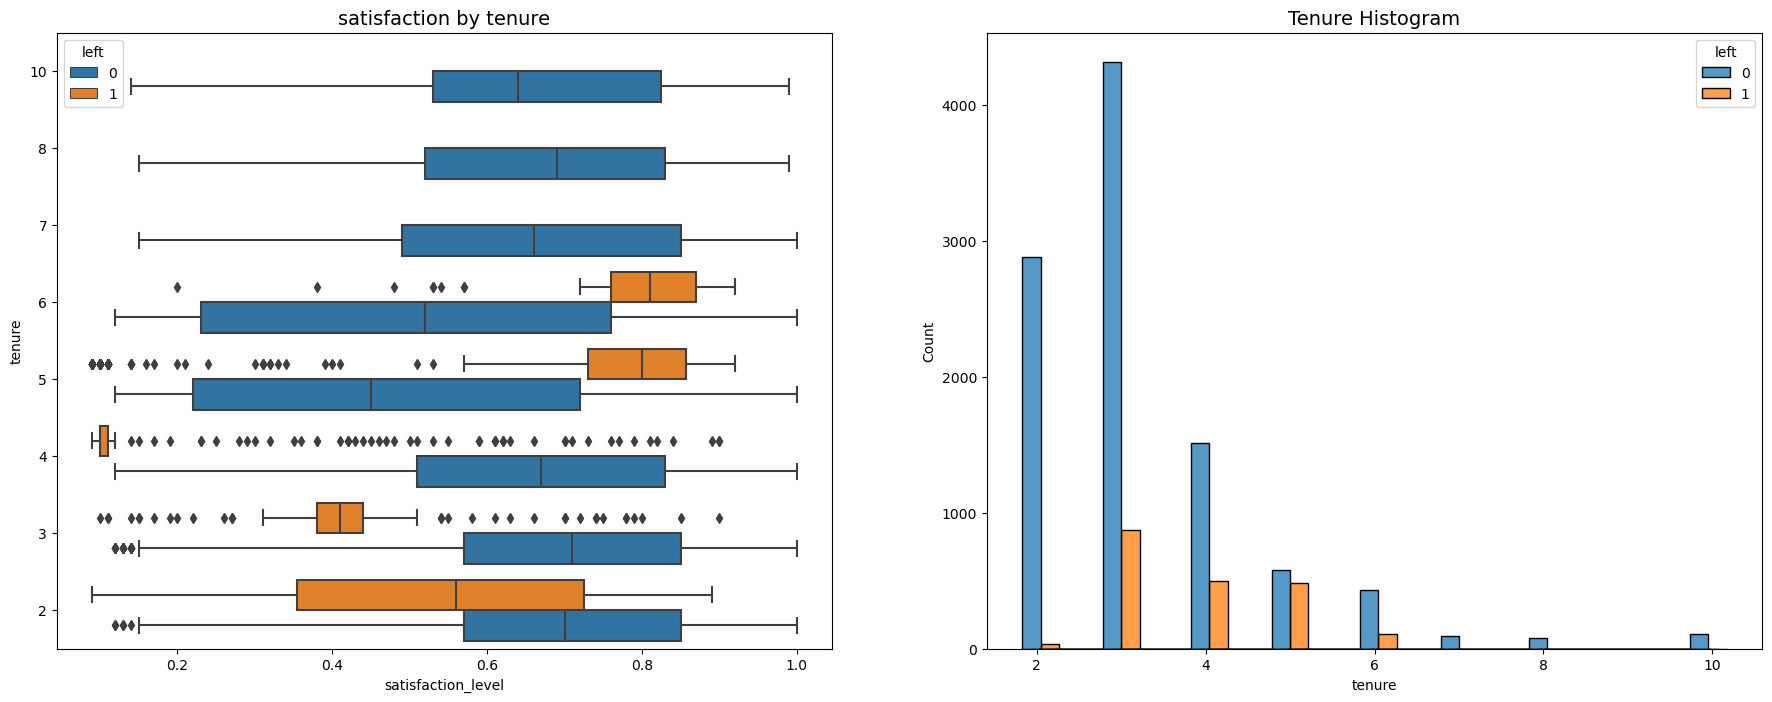

In [21]:
fig, ax = plt.subplots(1,2, figsize = (22,8))

#creating boxplot showing distribution of satisfaction level by tenure
sns.boxplot(data = df1, x = 'satisfaction_level', y= 'tenure', hue='left', orient= 'h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('satisfaction by tenure', fontsize = 14)

# creating histogram distribution of tenure
tenure_stay = df1[df1['left'] ==0]['tenure']
tenure_left = df1[df1['left'] ==1]['tenure']
sns.histplot(data= df1, x = 'tenure', hue = 'left', multiple= 'dodge', shrink = 5, ax= ax[1])
ax[1].set_title('Tenure Histogram', fontsize = '14')
plt.show()

• Employees who left are either dissatisfied employees with shorter tenure and very satisfied employees with medium-length tenure
• Four-year employees who left have unusually low satisfaction level
• The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed



### Model Building and Evaluation

#### Logistic Regression
Because this is a binary classification task, the binomial logistic regression model is suitable. Before proceeding with building a logistic regression model, we need to drop outliers from the data as logistic regression doesn't perform well with outliers and also validate the logistic regression model assumptions which are:

* the outcome variable is categorical
* observations are independent of each other
* there was no severe multicollinearity among X variables
* No extreme outlier (outliers were removed)"



In [22]:
#dropping outliers since logistic regression doesn't handle them well
df1.drop(outliers.index, inplace=True)

C:\Users\RONKE\AppData\Local\Temp\ipykernel_5628\216678500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(outliers.index, inplace=True)


C:\Users\RONKE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


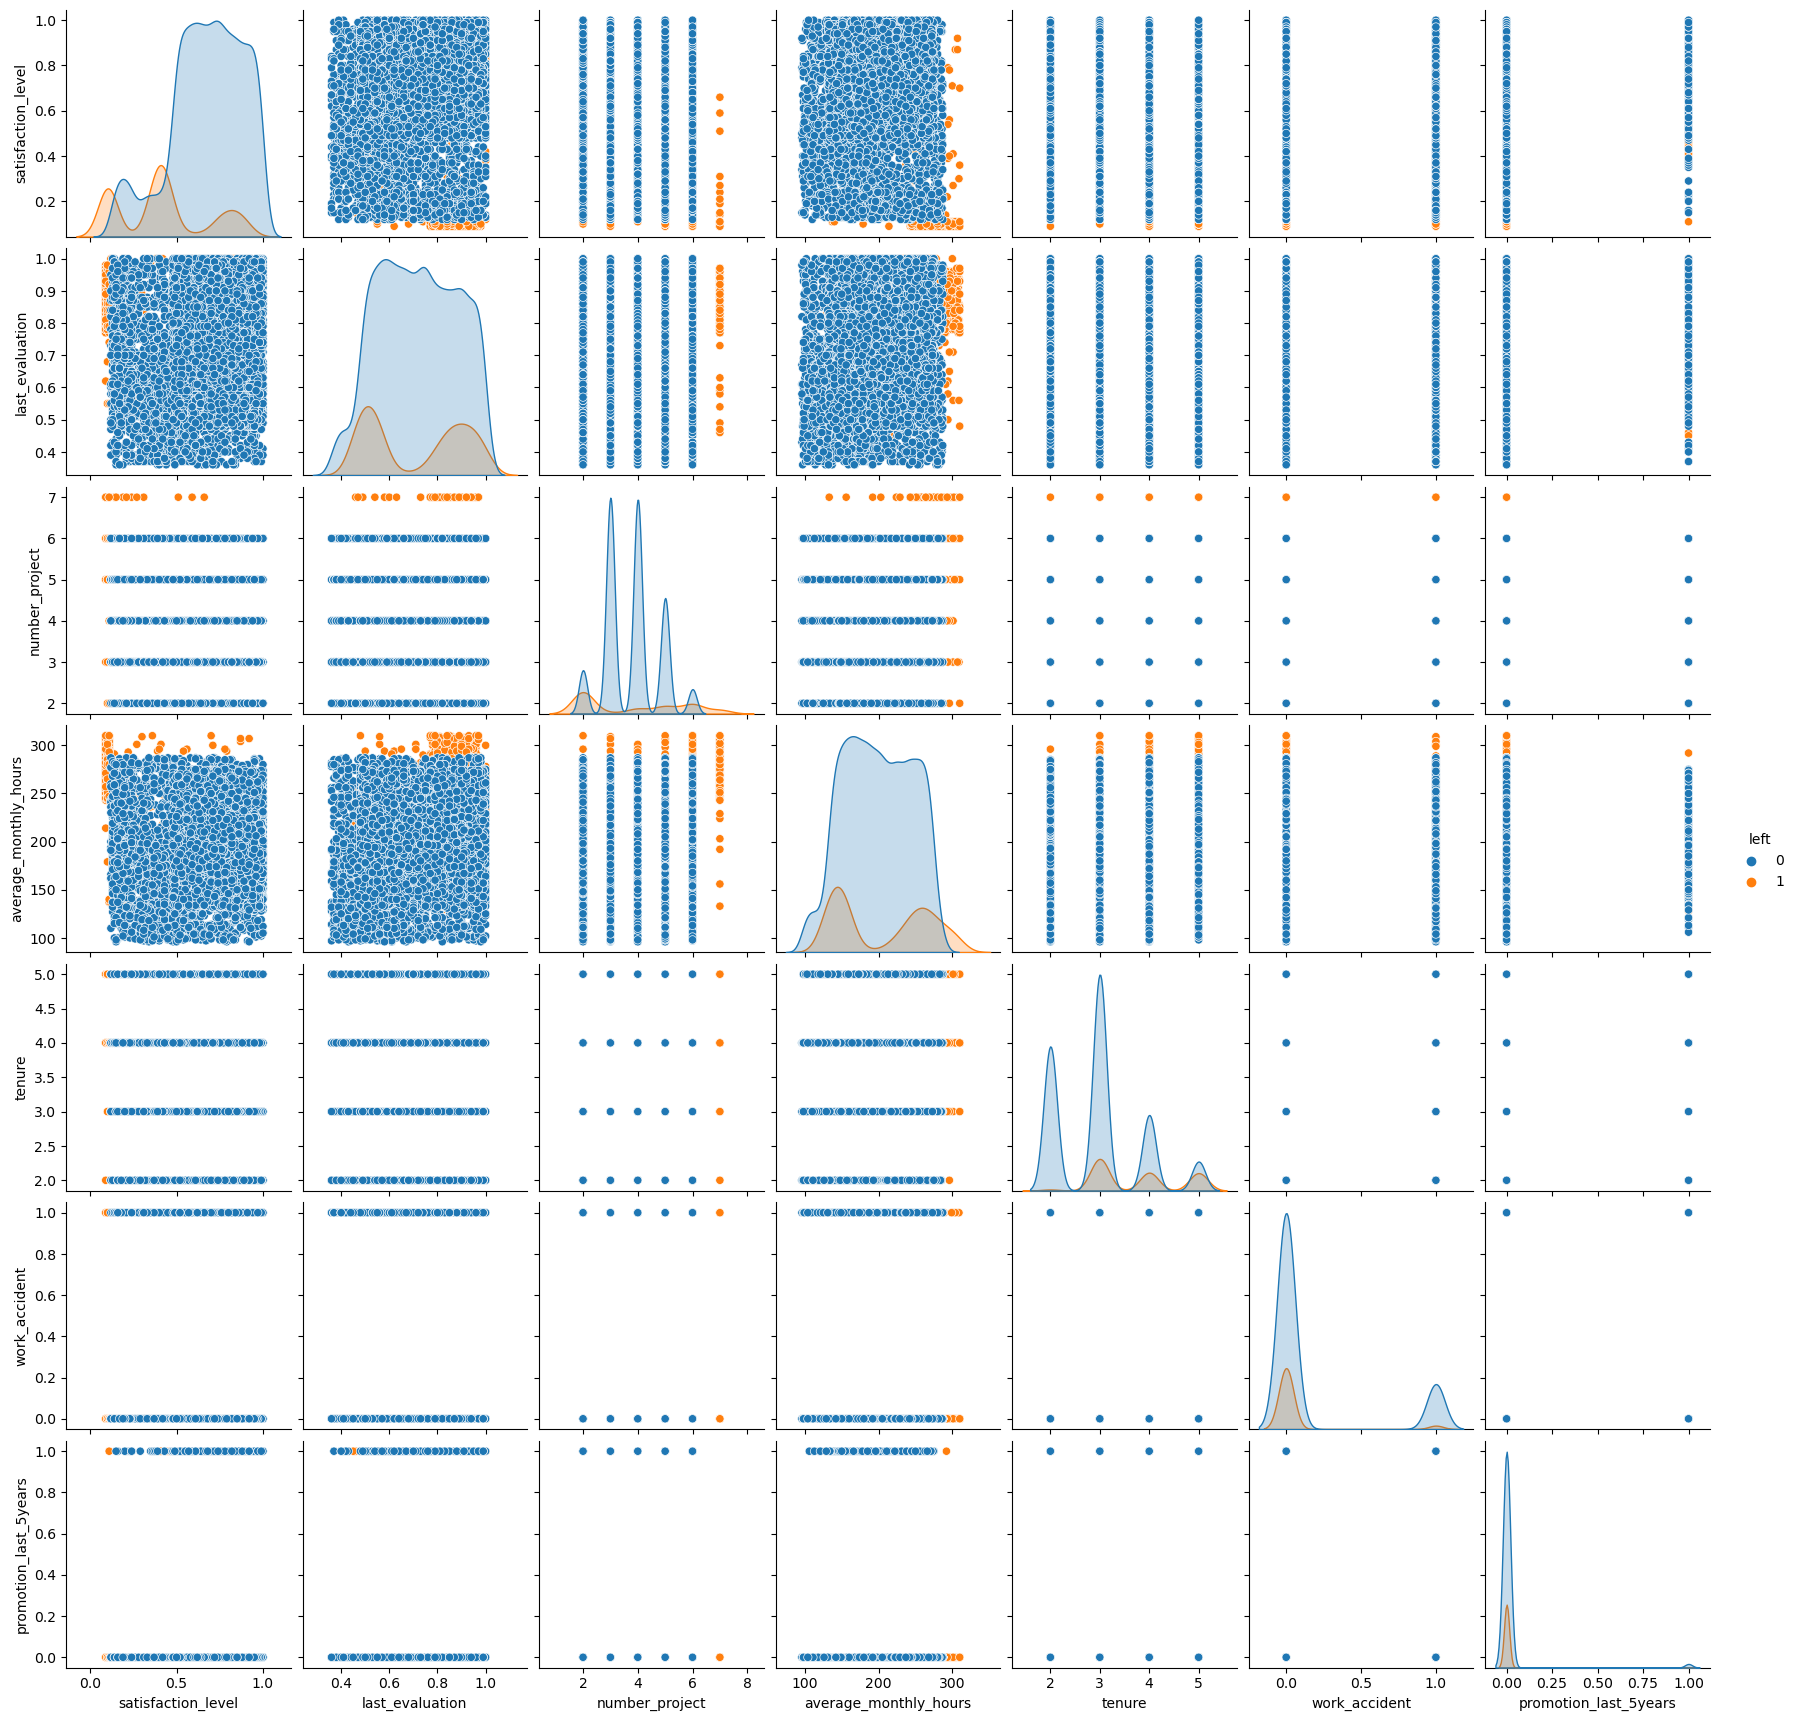

In [23]:
#observing relationships between variables in the dataset using a pairplot
sns.pairplot(df1,hue='left')
plt.show()

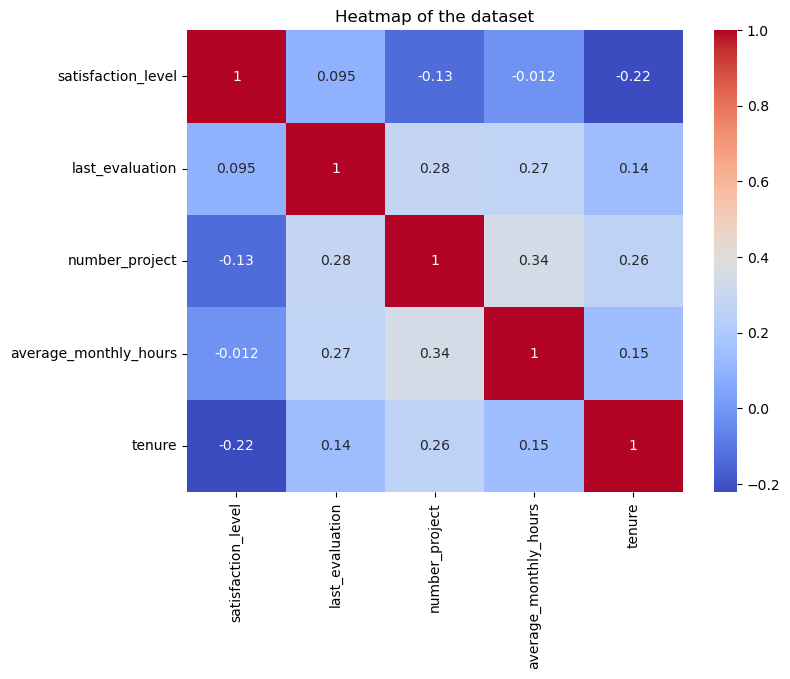

In [24]:
# Creating a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap of the dataset')
plt.show()

Before splitting the data into train and test sets, we need to encode some categorical variables. This include 'department' and 'salary' columns. Since the 'salary' column is hierarchical, it will follow ordinal encoding pattern

In [25]:
#encoding salary column
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df1['salary'] = ordinal_encoder.fit_transform(df1[['salary']])
df1['salary'] = df1['salary'].astype(int)
df1['salary']

C:\Users\RONKE\AppData\Local\Temp\ipykernel_5628\2891284310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary'] = ordinal_encoder.fit_transform(df1[['salary']])
C:\Users\RONKE\AppData\Local\Temp\ipykernel_5628\2891284310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary'] = df1['salary'].astype(int)


0        0
2        1
3        0
4        0
5        0
        ..
11985    1
11986    1
11987    1
11992    1
11999    0
Name: salary, Length: 11167, dtype: int32

In [26]:
#confirming encoding
df1['salary'].value_counts()

salary
0    5429
1    4854
2     884
Name: count, dtype: int64

In [27]:
#converting the rest of the categorical variables to dummies
df1 = pd.get_dummies(df1, drop_first = False)

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [28]:
#splitting the dataset into training and test sets
y= df1['left']
X = df1.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y,  random_state=42)

In [29]:
#instantiating and fitting the logistic regression model
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [30]:
#Obtaining parameter estimate
clf.coef_

array([[-4.38190174e+00, -1.79365161e-02, -4.89802689e-01,
         3.64515431e-03,  1.11535704e+00, -1.53339708e+00,
        -9.64620473e-01, -5.17026728e-01, -1.35014611e-01,
        -3.17912000e-01, -1.76443367e-01, -3.03896663e-02,
        -2.78228796e-01, -5.76031864e-02, -1.67409716e-01,
         2.40159145e-02,  3.74204096e-02,  2.05356601e-03]])

In [31]:
# Using the logistic regression model to get predictions on the test set
y_pred = clf.predict(X_test)

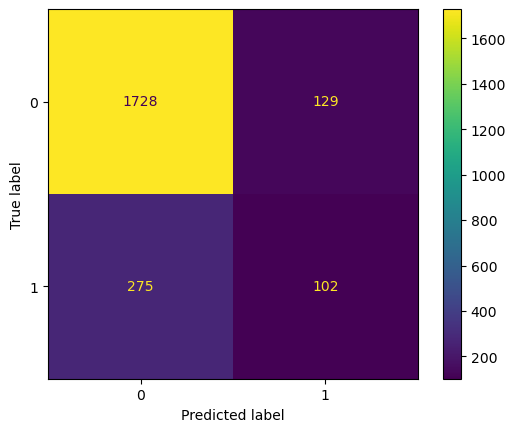

In [32]:
# Computing values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
#plot confusion matrix
disp.plot(values_format='')
#display plot
plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displayed the number of false positives.
The bottom-left quadrant displayed the number of false negatives.
The bottom-right quadrant displayed the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

In [33]:
#printing evaluation metric scores
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.8191584601611459
Precision: 0.44155844155844154
Recall: 0.27055702917771884
F1 Score: 0.33552631578947373


The evaluation scores are pretty low. The model rather performed well in predicting that an employee would not leave than in predicting they would. This might be due to class imbalance . we have a larger count for not leaving than left. They model tend to favour the majority class.

We can generate a classification report to confirm this

In [34]:
#creating a classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      1857
    Predicted would leave       0.44      0.27      0.34       377

                 accuracy                           0.82      2234
                macro avg       0.65      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

#### Decision Tree Model

Constructing a decision tree model and setting up a cross-validated grid-search to exhuastively search for the best model parameters.

In [35]:
# Instantiating model
tree = DecisionTreeClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assigning a dictionary of scoring metrics to capture
scoring =  {metric: metric for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']}

# Instantiating GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [36]:
%%time
#Fitting the decision tree model to the training data.
tree1.fit(X_train, y_train)

CPU times: total: 14 s
Wall time: 19.7 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Next we identify the optimal values for the decision tree parameters

In [37]:
# Checking best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [38]:
#checking the best AUC score
# Check best parameters
tree1.best_score_

0.9738962140467065

In [39]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [40]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.95367,0.915604,0.934218,0.978282,0.973896


In [41]:
y2_pred = tree1.predict(X_test)

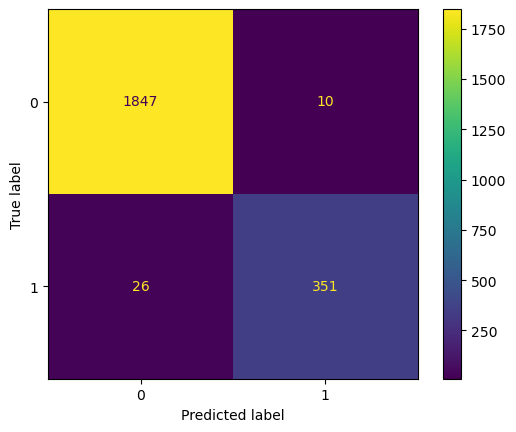

In [42]:
# Computing values for confusion matrix
cm = confusion_matrix(y_test, y2_pred, labels = tree1.classes_)
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = tree1.classes_)
#plot confusion matrix
disp.plot(values_format='')
#display plot
plt.show()

This model was able to predict employees who will leave very well

Next, we explore the decision tree splits to discover the most important features

**Decision Splits**

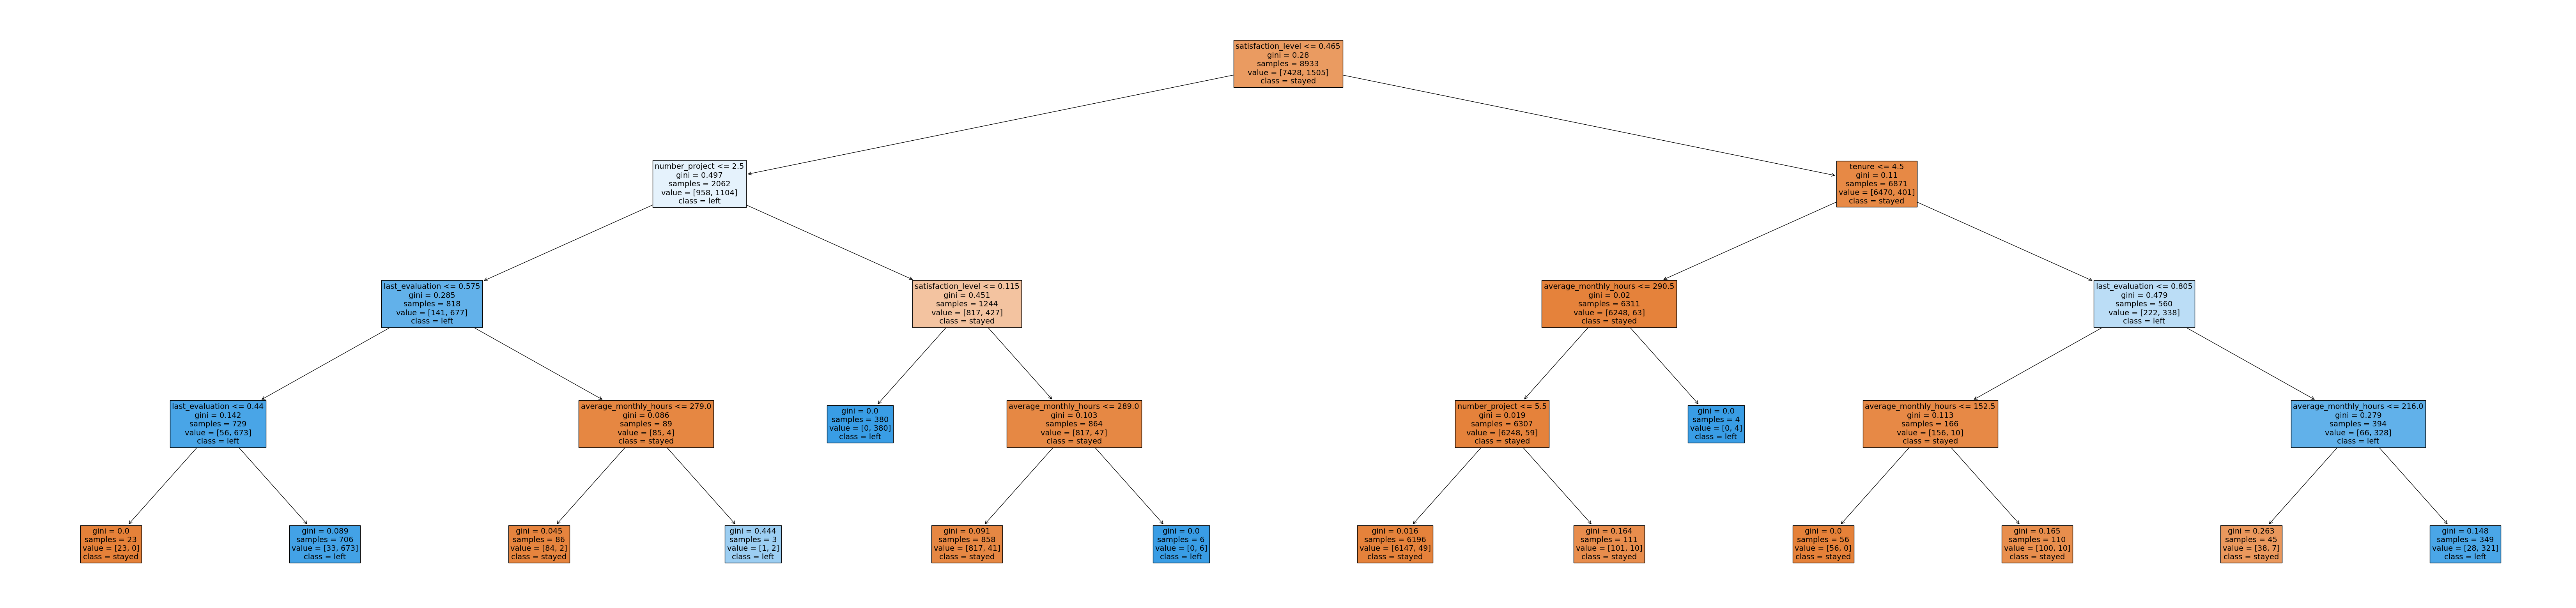

In [43]:
feature_names_list = X.columns.tolist()
class_names_list = list({0: 'stayed', 1: 'left'}.values())
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=4, fontsize=14, feature_names=feature_names_list, 
          class_names=class_names_list, filled=True);
plt.show()

**you can double-click on the tree image to zoom in on it and inspect the splits.**

#### Decision Tree Feature Importance

In [44]:
#determining feature importance
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.552777
tenure,0.167831
last_evaluation,0.139897
number_project,0.107906
average_monthly_hours,0.031589


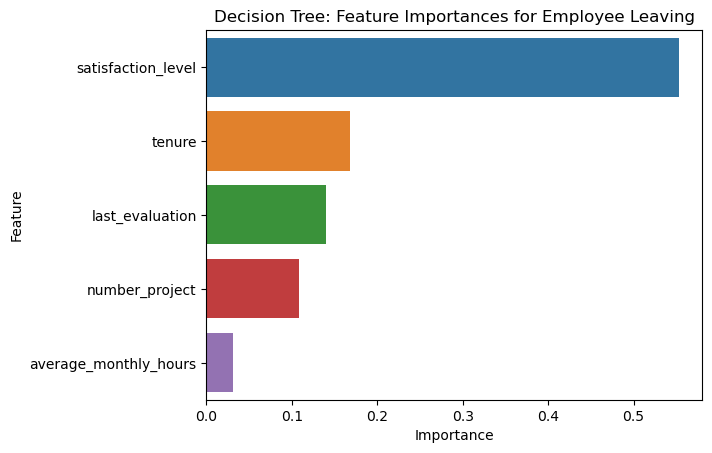

In [45]:
#creating a bar plot to visualise Decision tree feature importance
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Conclusion and Recommendation

The most important factor that contributes to employee leaving or staying is their "satisfaction level"
I recommend that the HR department at Salifort Motors conducts an employee survey. This survey should aim to gather insights directly from employees regarding the aspects that motivate them at work. Understanding these motivators can guide the organization in enhancing employee satisfaction levels 